# Final Project - Data Prep and EDA

DUE: April 16, 2024 (Wed)  
Pair Programming: Optional, but highly encouraged  
Name(s): Harrison Halesworth 
Class: CSCI 349 - Intro to Data Mining  
Section: 01-11am
Semester: Spring 2024  
Instructors: Brian King, Joshua Stough

"...data were acquired from the laboratory of Medical City Hospital and (the Specializes Center for Endocrinology and Diabetes-Al-Kindy Teaching Hospital"

The problem I am addressing is the diagnosis of Diabetes on hospital patients and trying to use other measured medical data for individual patients to try and understand which are good indicators of Diabetes diagnosis in the future. I am interested in this topic because I myself have Diabetes and even though I ended up being diagnosed with Type 1 Diabetes in my infancy due to genetic predisposure, I am still very interested in what types of things can lead to the dreaded onset Diabetes, Type 2 Diabetes.

The data I am using to evaluate this problem is from the labs results of "The Specializes Center for Endocrinology and Diabetes-Al-Kindy Teaching Hospital" and it consists of around 1000 instances that are meant to be individual patients, and there are are 12 features in the dataset including the target variable, the diagnosis, which consists of Y, N, or P which is yes, no or pre-diabetic. The other features included are Gender, Age, Urea (Urea is a waste product formed in the liver when the body breaks down proteins, and it is excreted by the kidneys through urine), Creatinine Ratio (The creatinine ratio, often referred to as the urine creatinine-to-serum creatinine ratio, is a measure used to assess kidney function and detect abnormalities in the urinary system), HBA1C (HbA1c, also known as glycated hemoglobin or hemoglobin A1c provides an indication of a person's average blood sugar levels over the past 2-3 months), Cholesterol, Triglycerides (Triglycerides are a type of fat (lipid) found in your blood. When you eat, your body converts any calories it doesn't need to use right away into triglycerides. The triglycerides are stored in your fat cells. Later, hormones release triglycerides for energy between meals), HDL Cholesterol ("good" cholesterol), LDL Cholesterol ("bad" cholesterol), VLDL ("really bad" cholesterol), and Body Mass Index (compares weight to height and indicates how appropriate the weight is for that height).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading in Data & Early Inspection

In [2]:
df = pd.read_csv('C:\\Users\\hhale\\csci349_2024sp\\project\\data\\diabetes.csv')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
df.shape

(1000, 14)

The dataset has 1000 observations and 14 variables, including one target variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [5]:
df["CLASS"].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

For some reason the Y and P categories of this target variable are repeated, so I will combine them down.

In [6]:
df["CLASS"] = df["CLASS"].str.upper()
df["CLASS"] = df["CLASS"].str.strip()
df['CLASS'] = pd.Categorical(df['CLASS'])
df["CLASS"].value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

In [7]:
df["Gender"].value_counts()

Gender
M    565
F    434
f      1
Name: count, dtype: int64

Let's do the same for gender, the other categorical variable.

In [8]:
df["Gender"] = df["Gender"].str.upper()
df["Gender"] = df["Gender"].str.strip()
df["Gender"] = pd.Categorical(df["Gender"])
df["Gender"].value_counts()

Gender
M    565
F    435
Name: count, dtype: int64

In [9]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [10]:
repeated = df["ID"].value_counts()[df["ID"].value_counts() > 1]
repeated

ID
76     2
108    2
57     2
26     2
69     2
      ..
150    2
49     2
144    2
145    2
147    2
Name: count, Length: 200, dtype: int64

In [11]:
not_repeated = df["ID"].value_counts()[df["ID"].value_counts() < 2]
not_repeated

ID
522    1
638    1
541    1
480    1
481    1
      ..
353    1
356    1
488    1
508    1
248    1
Name: count, Length: 600, dtype: int64

It seems that out of the 1000 observations, there are 100 IDs that appear twice and 600 that appear once as expected. Let's look and see if these observations with repeated IDs are in fact unique or exact copies

In [12]:
for ID in repeated.head().index:
    print(df[df["ID"]==ID])
    print("\n")

     ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
249  76       9903      M   73   4.3  79    6.0   5.3  1.4  1.5  3.2   0.6   
910  76       8978      M   60   5.4  64   10.4   3.8  1.5  0.8  2.3   0.6   

      BMI CLASS  
249  27.0     Y  
910  31.0     Y  


      ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
183  108      24007      M   38   4.0  67   10.2   5.2  2.0  1.1  3.2  14.0   
933  108      24345      M   51   2.5  55   13.0   6.3  7.2  1.2  3.3   2.8   

      BMI CLASS  
183  47.0     Y  
933  35.0     Y  


     ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
165  57      23990      M   35   4.8  64    7.7   3.7  1.0  1.2  2.0   7.2   
894  57       6544      M   54   3.0  67    7.0   4.8  1.7  1.3  2.8   0.7   

      BMI CLASS  
165  27.3     Y  
894  26.0     Y  


     ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
748  26      34520      M   60   7.5  83    7.

Due to some IDs being repeated despite representing different patients, I will just be removing the variable altogether and identify observations with dataframe indeces.

In [13]:
df = df.drop("ID", axis=1)
df.head()

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


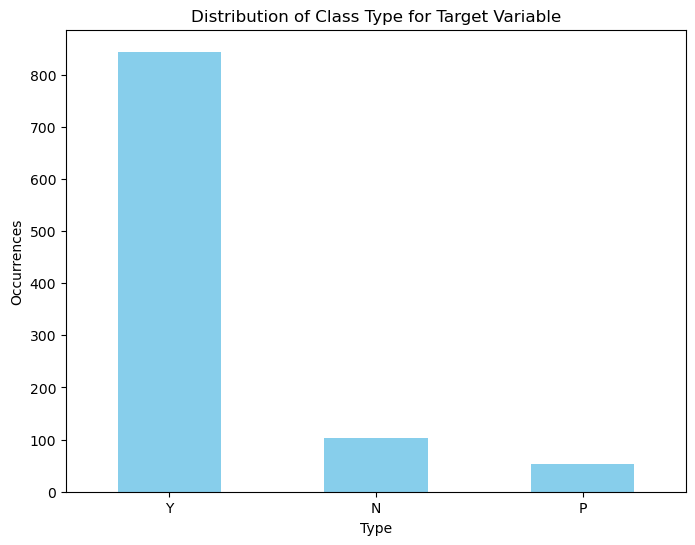

In [14]:
plt.figure(figsize=(8, 6))
df["CLASS"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribution of Class Type for Target Variable")
plt.xlabel("Type")
plt.ylabel("Occurrences")
plt.xticks(rotation=0)
plt.show()

In [15]:
df["No_Pation"].value_counts()

No_Pation
454316    19
856        2
87654      2
71741      2
34290      2
          ..
34342      1
3275       1
34343      1
23973      1
24054      1
Name: count, Length: 961, dtype: int64

In [16]:
df[df["No_Pation"]==454316]

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
96,454316,F,54,6.3,106,5.6,4.3,2.0,1.3,2.2,0.9,20.0,N
97,454316,F,50,3.3,70,4.9,3.7,0.9,1.2,2.7,0.6,24.0,N
98,454316,M,60,7.5,70,0.9,3.4,5.3,1.1,3.6,0.8,24.0,N
99,454316,M,77,5.0,106,5.4,0.0,2.8,0.8,1.8,0.7,19.0,N
100,454316,F,59,4.7,58,4.1,4.5,1.8,1.8,1.8,1.3,22.5,N
101,454316,F,57,4.6,97,0.9,3.2,1.3,0.9,3.0,1.1,22.0,N
981,454316,M,65,5.0,97,7.0,4.3,4.3,1.4,1.5,2.0,27.0,Y
982,454316,F,54,5.0,88,6.8,5.1,2.1,1.1,3.0,1.0,30.0,Y
983,454316,M,64,8.8,106,8.5,5.9,2.1,1.2,4.0,1.2,32.0,Y
984,454316,F,60,5.0,70,8.1,5.2,3.3,1.4,0.6,3.0,27.0,Y


The variable No_Pation which I believe is supposed to be the patient number is also completely useless here as there are multiple repeats deescribing two different patients and a specific number that occurs 19 times, so I will also be stripping that variable as well.

In [17]:
df = df.iloc[:, 1:]
df

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


Let's quickly take a look at the distributions of somee of theother variables and do some renaming.

In [18]:
df = df.rename(columns={"AGE": "Age", "Urea": "UREA", "Cr": "CR", "HbA1c": "HBA1C", "Chol": "CHOL", "CLASS": "Target"})
df.head()

,Gender,Age,UREA,CR,HBA1C,CHOL,TG,HDL,LDL,VLDL,BMI,Target
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


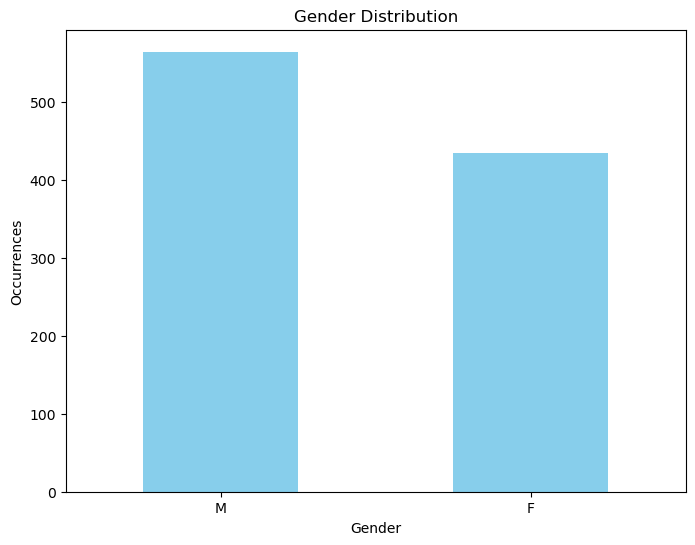

In [19]:
plt.figure(figsize=(8, 6))
df["Gender"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Occurrences")
plt.xticks(rotation=0)
plt.show()

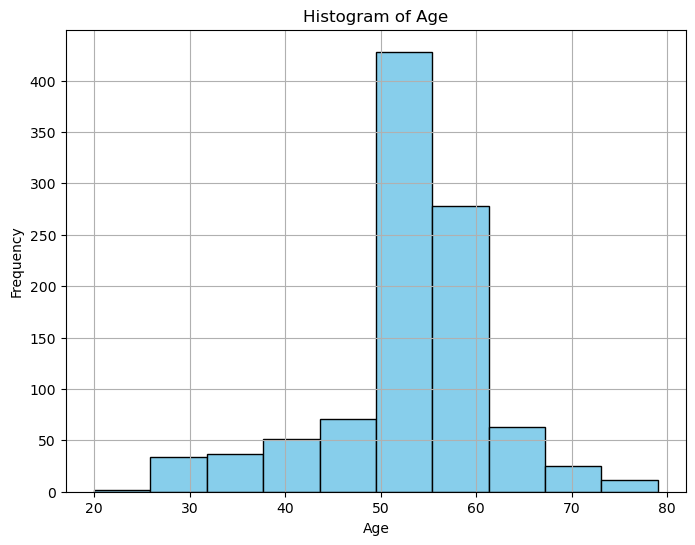

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(df["Age"], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

There is a nearly normal distribution for age and a nearly 50/50 split for gender

Now let's look at the distributions of some of the numeric variables

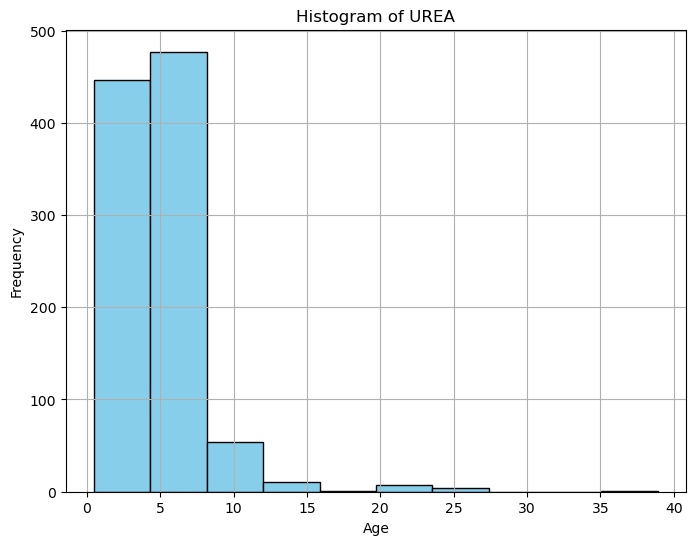

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(df["UREA"], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of UREA")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

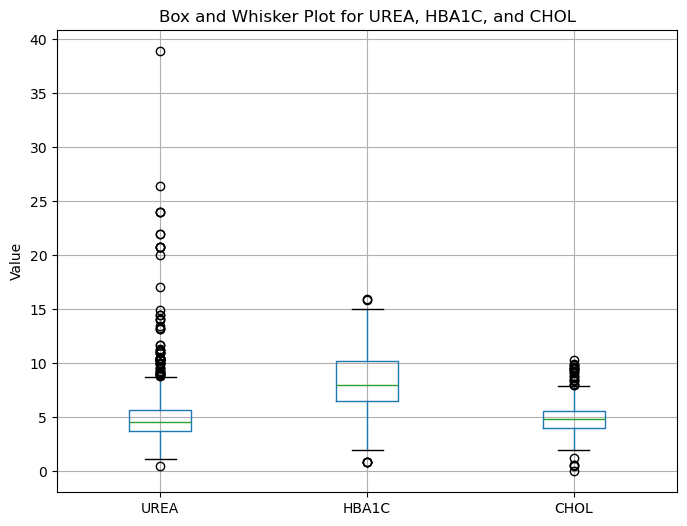

In [22]:
plt.figure(figsize=(8, 6))
df.boxplot(column=["UREA", "HBA1C", "CHOL"])
plt.title("Box and Whisker Plot for UREA, HBA1C, and CHOL")
plt.ylabel("Value")
plt.show()

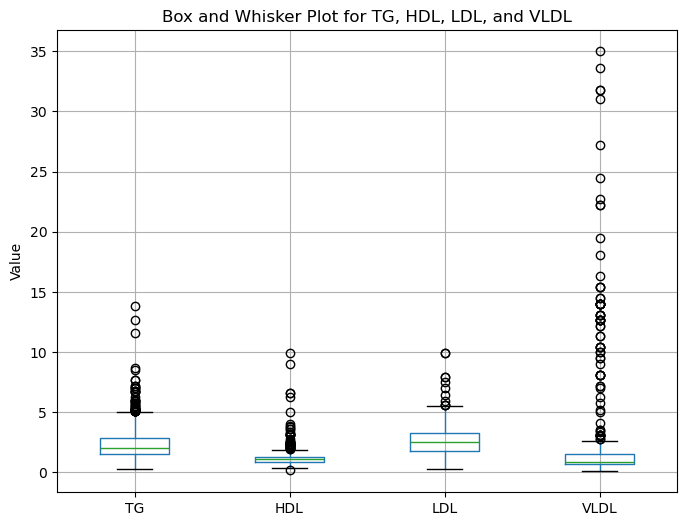

In [23]:
plt.figure(figsize=(8, 6))
df.boxplot(column=['TG', 'HDL', 'LDL', 'VLDL'])
plt.title('Box and Whisker Plot for TG, HDL, LDL, and VLDL')
plt.ylabel('Value')
plt.show()

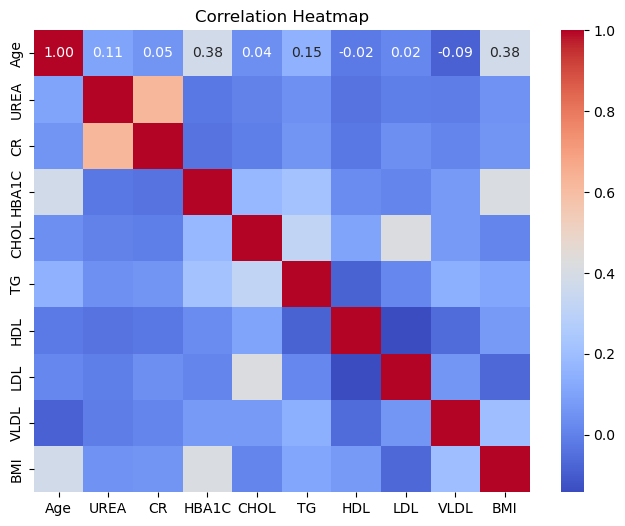

In [24]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [25]:
tmp = df.drop("Gender", axis=1)
means = tmp.groupby("Target", observed=False).mean()
means

,Age,UREA,CR,HBA1C,CHOL,TG,HDL,LDL,VLDL,BMI
Target,,,,,,,,,,
N,44.233010,4.680583,62.796117,4.560194,4.268932,1.625243,1.227184,2.625243,0.943689,22.374757
P,43.283019,4.511321,66.075472,6.003774,4.579245,2.126415,1.127358,2.493396,0.983019,23.933962
Y,55.305687,5.217468,69.873223,8.878270,4.953104,2.452026,1.206872,2.615213,2.020616,30.811517


In [26]:
df.head()

,Gender,Age,UREA,CR,HBA1C,CHOL,TG,HDL,LDL,VLDL,BMI,Target
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In the modeling portion of this project I am still undecided so I plan on testing out a few different machine learning methods that we learned this semester. I definitely want to begin with decision trees largely due to their interpretability, I then want to move on to nerual nets and kNN, and perhaps clustering at the very end. I will see which give me the best results and include them in my final report. I may also use gridsearch to try and find optimal hyperparameters for these machine learning methods. In all honesty, a more simple model might be the ideal choice as there are only 1000 instances and I want as low bias and variance simultaneously as possible. Choosing test and training data will also be a challenge for the same reason.

With this project I want to prove the undeniable link between obesity, age, and overall health markers and onset diabetes and I think the modeling portion will prove this very easily, the correlation was already somewhat noticeable just during this EDA phase. All in all, I just want to learn more about Diabetes diagnosis as I feel empathy for these patients involved in the data.

By the end of this project I want to have a model that has as close to perfect accuracy with different splits on the limited data, I want the results to be interpretable, I want to understand and be able to describe the limitations as well as some of the points of ease that were involved in this project, and I would generally just like to have some real experience with the data mining pipeline.

In [29]:
df.to_pickle('./data/data.pkl')